In [4]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Removing unnecessary warnings

import warnings
warnings.filterwarnings("ignore")

In [6]:
pd.set_option("display.max_columns",50)

In [7]:
# loading dataset

inp=pd.read_csv("leads.csv")
inp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
inp.shape

(9240, 37)

In [9]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# removing "Select" from categorical variables
inp=inp.replace("Select",np.NaN)

In [11]:
# For finding percentage of missing values in each variable

round(inp.isna().sum()/inp.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Some missing value percentage is greater than 45. So they are to be dropped.

In [12]:
inp.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
inp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
bool_list=['Do Not Email', 'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

In [15]:
# Defining the map function

def bool_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
inp[bool_list] = inp[bool_list].apply(bool_map)

In [16]:
inp[bool_list].apply(lambda x: x.unique())

Do Not Email                                [0, 1]
Do Not Call                                 [0, 1]
Search                                      [0, 1]
Magazine                                       [0]
Newspaper Article                           [0, 1]
X Education Forums                          [0, 1]
Newspaper                                   [0, 1]
Digital Advertisement                       [0, 1]
Through Recommendations                     [0, 1]
Receive More Updates About Our Courses         [0]
Update me on Supply Chain Content              [0]
Get updates on DM Content                      [0]
I agree to pay the amount through cheque       [0]
A free copy of Mastering The Interview      [0, 1]
dtype: object

In [17]:
# The variables with 100% values same are to be dropped

inp=inp.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content",
              "Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

In [18]:
# dropping comuns with more than 45% missing values

inp=inp.drop(["How did you hear about X Education","Lead Quality","Lead Profile","Asymmetrique Activity Index",
"Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1)

In [19]:
inp.shape

(9240, 25)

In [20]:
inp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Interested in other courses,NaN,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,NaN,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,Will revert after reading the email,Mumbai,0,Modified


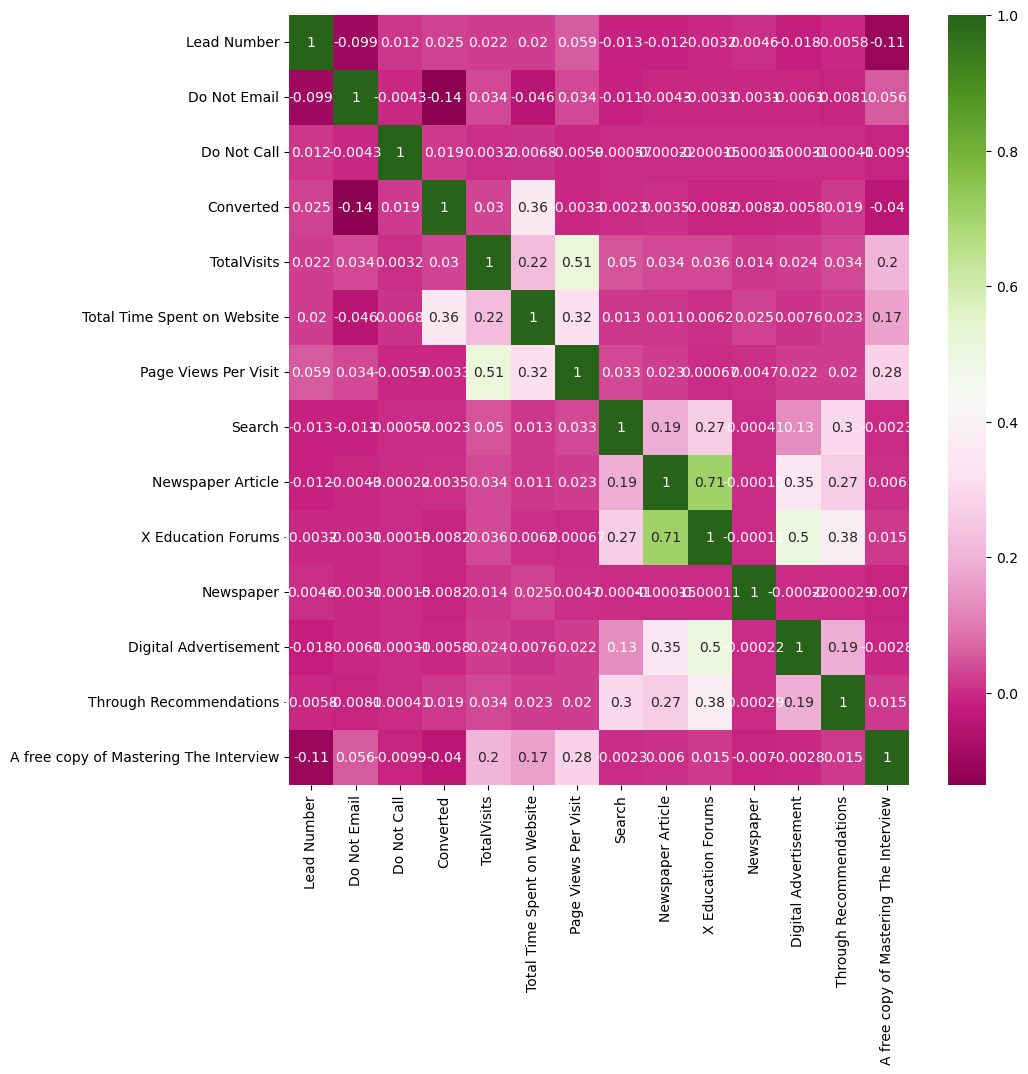

In [21]:
#For finding correlation between variables

plt.figure(figsize=[10,10])
sns.heatmap(inp.corr(),annot= True,cmap="PiYG")
plt.show()

## Analysis of categorical columns

In [22]:
cat_columns=['Lead Origin', 'Lead Source','Last Activity','Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity']

In [23]:
for i in cat_columns:
    print(i)
    print(round(100*inp[i].value_counts()/len(inp[i]),2))
    print("*"*50)
    print()

Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
**************************************************

Lead Source
Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64
**************************************************

Last Activity
Email Opened                    37.20
SMS Sent            

In [24]:
# missing value percentage of categorical columns

100*inp[cat_columns].isna().sum()/inp.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
City                                             39.707792
Last Notable Activity                             0.000000
dtype: float64

In [25]:
# imputing missing values with mode value

inp["Country"].fillna(inp["Country"].mode()[0],inplace=True)
inp["Lead Source"].fillna(inp["Lead Source"].mode()[0],inplace=True)
inp["Last Activity"].fillna(inp["Last Activity"].mode()[0],inplace=True)
inp["What matters most to you in choosing a course"].fillna(inp["What matters most to you in choosing a course"].mode()[0],inplace=True)
inp["City"].fillna(inp["City"].mode()[0],inplace=True)

## Analysis of Binary columns

In [26]:
bin_columns=['Do Not Email', 'Do Not Call', 'Converted', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

In [27]:
for i in bin_columns:
    print(i)
    print(round(100*inp[i].value_counts()/len(inp[i]),2))
    print("*"*50)
    print()

Do Not Email
0    92.06
1     7.94
Name: Do Not Email, dtype: float64
**************************************************

Do Not Call
0    99.98
1     0.02
Name: Do Not Call, dtype: float64
**************************************************

Converted
0    61.46
1    38.54
Name: Converted, dtype: float64
**************************************************

Search
0    99.85
1     0.15
Name: Search, dtype: float64
**************************************************

Newspaper Article
0    99.98
1     0.02
Name: Newspaper Article, dtype: float64
**************************************************

X Education Forums
0    99.99
1     0.01
Name: X Education Forums, dtype: float64
**************************************************

Newspaper
0    99.99
1     0.01
Name: Newspaper, dtype: float64
**************************************************

Digital Advertisement
0    99.96
1     0.04
Name: Digital Advertisement, dtype: float64
**************************************************

Through Re

In [28]:
inp=inp.drop(['Do Not Email', 'Do Not Call', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations'],axis=1)

In [29]:
inp.shape

(9240, 17)

In [30]:
inp.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [31]:
inp.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Email Opened


# Univariate analysis

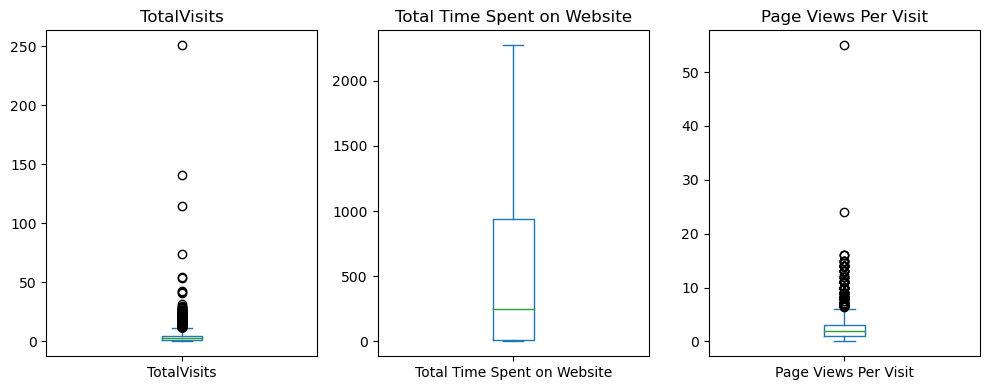

In [32]:
#univariate analysis on numerical variables

plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
plt.title("TotalVisits")
inp.TotalVisits.plot(kind="box")

plt.subplot(1,3,2)
plt.title("Total Time Spent on Website")
inp["Total Time Spent on Website"].plot(kind="box")

plt.subplot(1,3,3)
plt.title("Page Views Per Visit")
inp["Page Views Per Visit"].plot(kind="box")
plt.tight_layout()
plt.show()

In [33]:
# Handling outliers for plotting better at 0-90%

perc = inp['Page Views Per Visit'].quantile([0,0.9]).values
inp['Page Views Per Visit'][inp['Page Views Per Visit'] <= perc[0]] = perc[0]
inp['Page Views Per Visit'][inp['Page Views Per Visit'] >= perc[1]] = perc[1]

perc = inp['TotalVisits'].quantile([0,0.9]).values
inp['TotalVisits'][inp['TotalVisits'] <= perc[0]] = perc[0]
inp['TotalVisits'][inp['TotalVisits'] >= perc[1]] = perc[1]

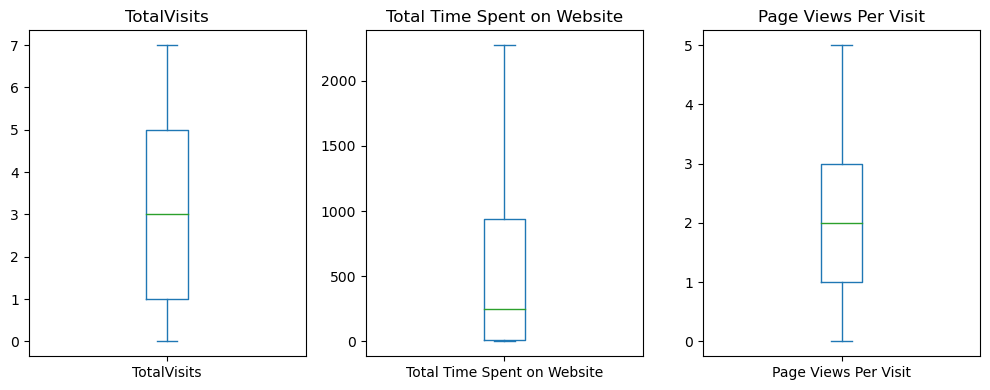

In [34]:
# plotting again using corrected range

plt.figure(figsize=[10,4])
plt.subplot(1,3,1)
plt.title("TotalVisits")
inp.TotalVisits.plot(kind="box")

plt.subplot(1,3,2)
plt.title("Total Time Spent on Website")
inp["Total Time Spent on Website"].plot(kind="box")

plt.subplot(1,3,3)
plt.title("Page Views Per Visit")
inp["Page Views Per Visit"].plot(kind="box")
plt.tight_layout()
plt.show()

# Bivariate analysis

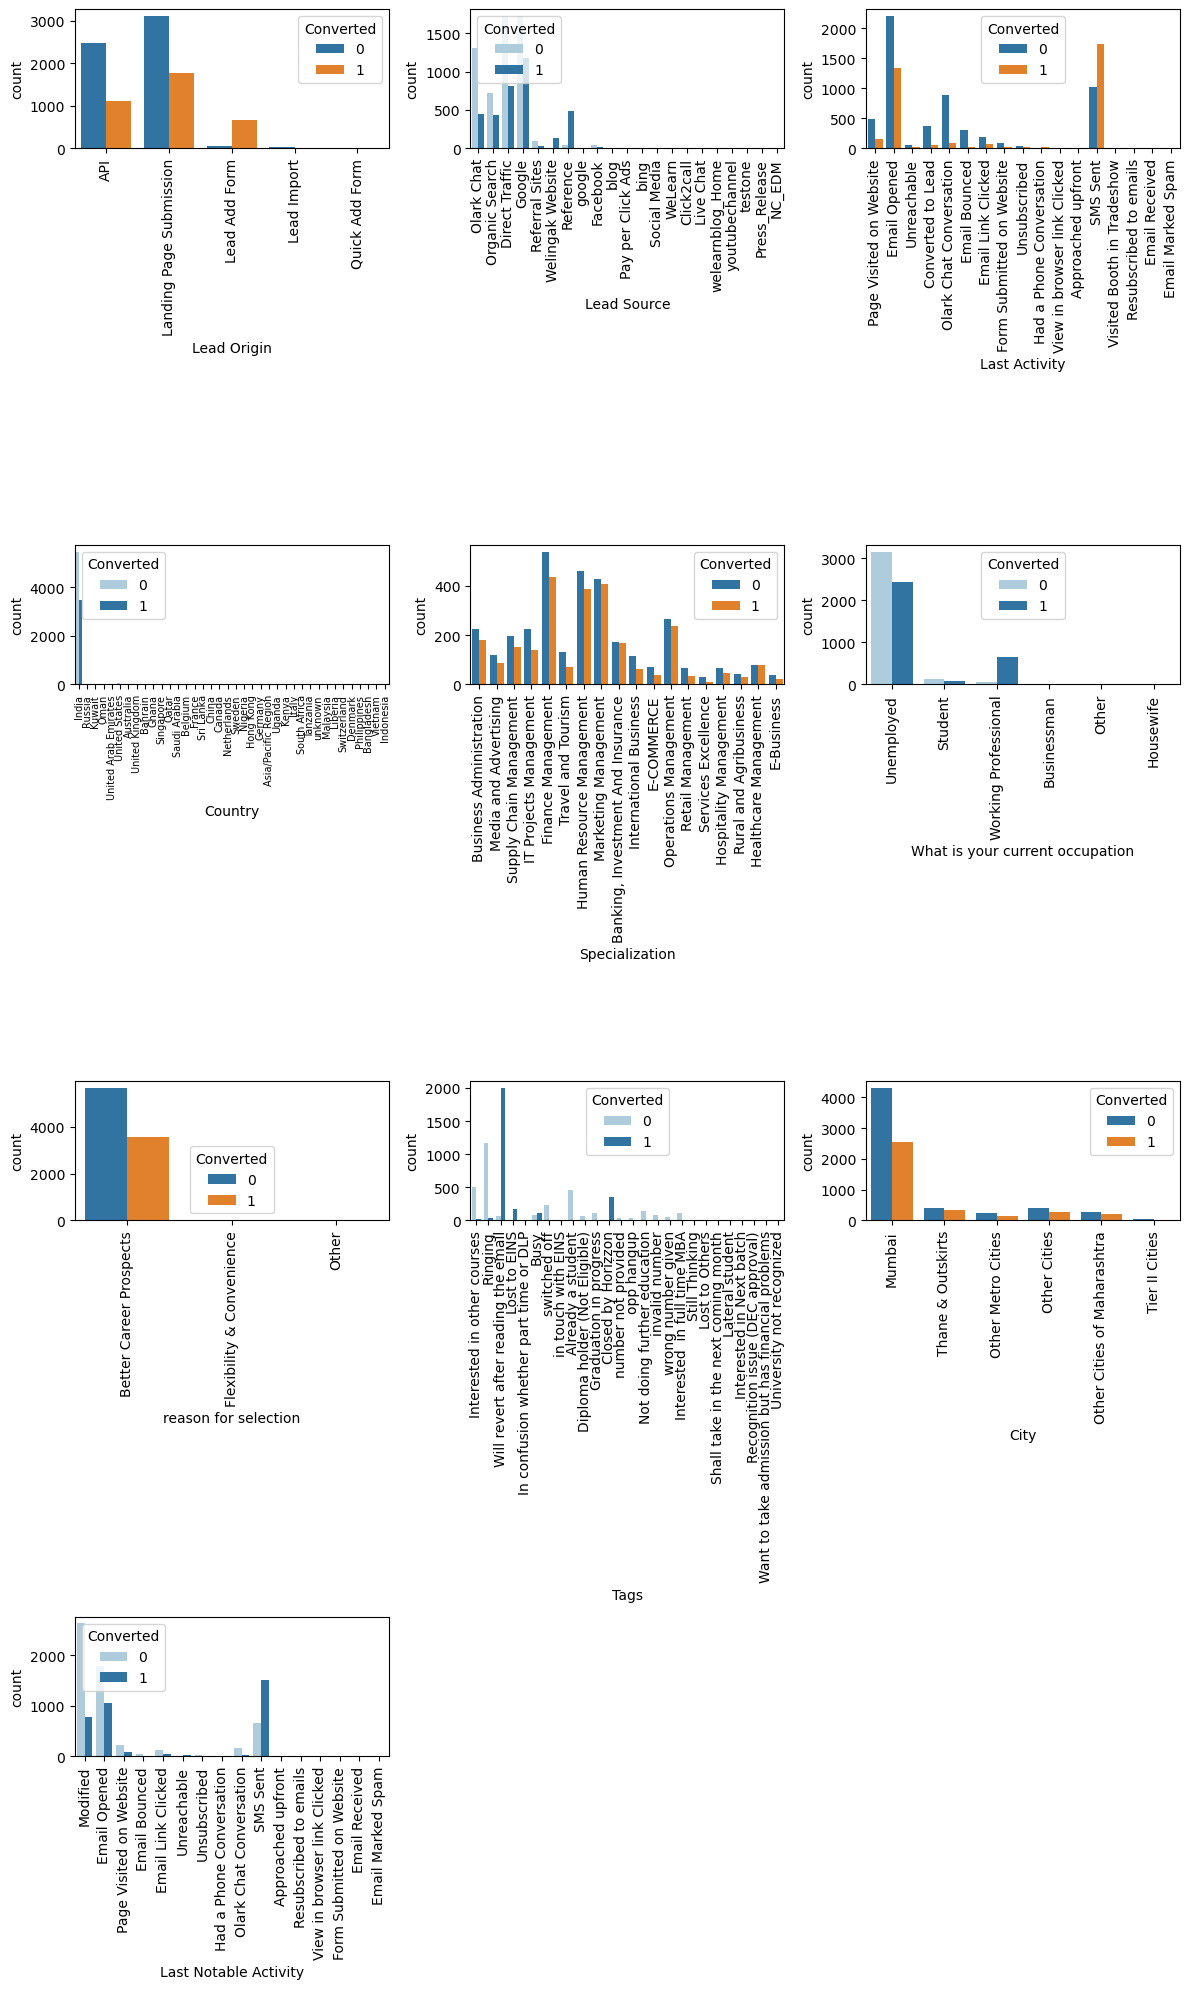

In [35]:
# Bivariate analysis on categorical variables

plt.figure(figsize=[12,20])

plt.subplot(4,3,1)
sns.countplot(x="Lead Origin",hue="Converted",data=inp)
plt.xticks(rotation=90)

plt.subplot(4,3,2)
sns.countplot(x="Lead Source",hue="Converted",data=inp,palette="Paired")
plt.xticks(rotation=90)

plt.subplot(4,3,3)
sns.countplot(x="Last Activity",hue="Converted",data=inp)
plt.xticks(rotation=90)

plt.subplot(4,3,4)
sns.countplot(x="Country",hue="Converted",data=inp,palette="Paired")
plt.xticks(fontsize=7,rotation=90)

plt.subplot(4,3,5)
sns.countplot(x="Specialization",hue="Converted",data=inp)
plt.xticks(rotation=90)

plt.subplot(4,3,6)
sns.countplot(x="What is your current occupation",hue="Converted",data=inp,palette="Paired")
plt.xticks(rotation=90)

plt.subplot(4,3,7)
sns.countplot(x="What matters most to you in choosing a course",hue="Converted",data=inp)
plt.xlabel("reason for selection")
plt.xticks(rotation=90)

plt.subplot(4,3,8)
sns.countplot(x="Tags",hue="Converted",data=inp,palette="Paired")
plt.xticks(rotation=90)

plt.subplot(4,3,9)
sns.countplot(x="City",hue="Converted",data=inp)
plt.xticks(rotation=90)

plt.subplot(4,3,10)
sns.countplot(x="Last Notable Activity",hue="Converted",data=inp,palette="Paired")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


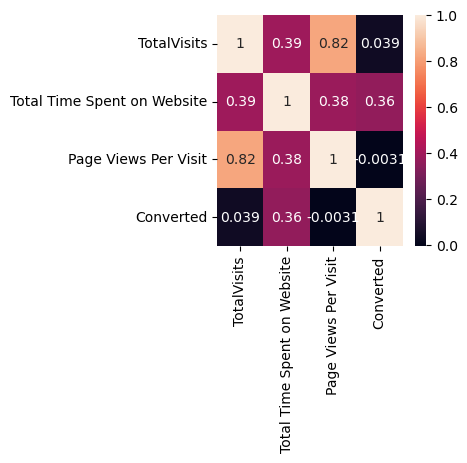

In [36]:
# Bivariate analysis on numerical variables
plt.figure(figsize=[3,3])
sns.heatmap(inp[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',"Converted"]].corr(),annot=True)
plt.show()

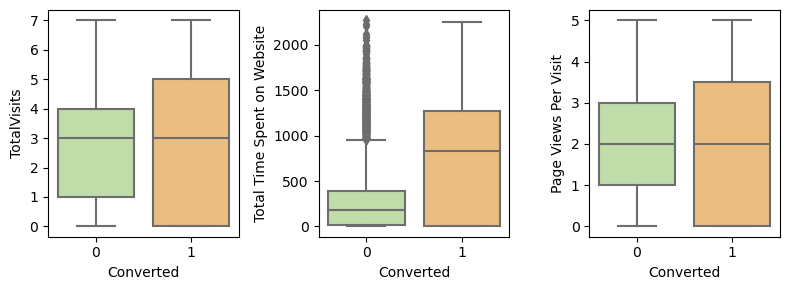

In [37]:
plt.figure(figsize=[8,3])

plt.subplot(1,3,1)
sns.boxplot(x="Converted", y="TotalVisits", data=inp,palette="Spectral_r")

plt.subplot(1,3,2)
sns.boxplot(x="Converted", y="Total Time Spent on Website", data=inp,palette="Spectral_r")

plt.subplot(1,3,3)
sns.boxplot(x="Converted", y="Page Views Per Visit", data=inp,palette="Spectral_r")

plt.tight_layout()
plt.show()

In [38]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [39]:
inp.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Email Opened


In [41]:
dummies = pd.get_dummies(inp[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'What matters most to you in choosing a course','City','Last Notable Activity']], drop_first=True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
inp = pd.concat([inp, dummies], axis=1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,0,Modified,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
inp = inp.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'What matters most to you in choosing a course','City','Last Notable Activity'], axis = 1)

In [46]:
inp.head(3)

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Tags,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,India,Interested in other courses,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,India,Ringing,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,India,Will revert after reading the email,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = inp.drop(['Churn','customerID'], axis=1)

X.head()